In [2]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6
import seaborn as sb
sb.set()

In [4]:
BBchart = pd.read_csv('BB.csv')

In [5]:
BBchart.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-02-04,2.145833,2.166667,1.895833,1.924479,1.924479,16788600
1,1999-02-05,1.929688,1.947917,1.822917,1.833333,1.833333,3053400
2,1999-02-08,1.854167,1.927083,1.783854,1.812500,1.812500,1548000
3,1999-02-09,1.822917,1.833333,1.656250,1.666667,1.666667,3501600
4,1999-02-10,1.708333,1.708333,1.604167,1.677083,1.677083,1597200


In [8]:
filename = 'BB.csv'
df = pd.read_csv(filename)
BBchartClosingPrices=df[['Date', 'Adj Close']]

In [9]:
BBchartClosingPrices.head()

,Date,Adj Close
0,1999-02-04,1.924479
1,1999-02-05,1.833333
2,1999-02-08,1.812500
3,1999-02-09,1.666667
4,1999-02-10,1.677083


In [15]:
BB = pd.DataFrame(pdr.get_data_yahoo('BB')['Close'])

In [16]:
BB.head()

,Close
Date,
2016-11-01,7.07
2016-11-02,7.02
2016-11-03,7.00
2016-11-04,6.97
2016-11-07,7.06


In [18]:
ma = 21
BB['returns'] = np.log(BB["Close"]).diff()
BB['ma'] = BB['Close'].rolling(ma).mean()
BB['ratio'] = BB['Close'] / BB['ma']

In [20]:
BB['ratio'].describe()

count    1238.000000
mean        1.005507
std         0.116333
min         0.596649
25%         0.951273
50%         0.998980
75%         1.043343
max         2.424786
Name: ratio, dtype: float64

In [21]:
percentiles = [5, 10, 50, 90, 95]
p = np.percentile(BB['ratio'].dropna(), percentiles)

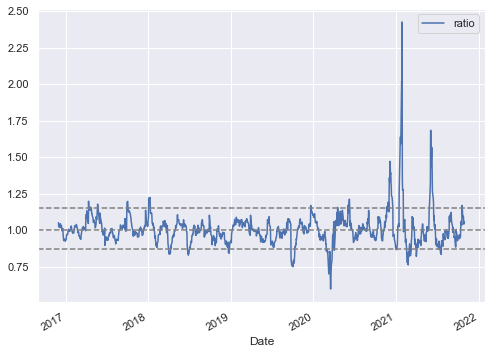

In [22]:
BB['ratio'].dropna().plot(legend = True)
plt.axhline(p[0], c= (.5,.5,.5), ls='--')
plt.axhline(p[2], c= (.5,.5,.5), ls='--')
plt.axhline(p[-1], c= (.5,.5,.5), ls='--');

In [25]:
short = p[-1]
long = p[0]
BB['position'] = np.where(BB.ratio > short, -1, np.nan)
BB['position'] = np.where(BB.ratio < long, 1, BB['position'])
BB['position'] = BB['position'].ffill()

<AxesSubplot:xlabel='Date'>

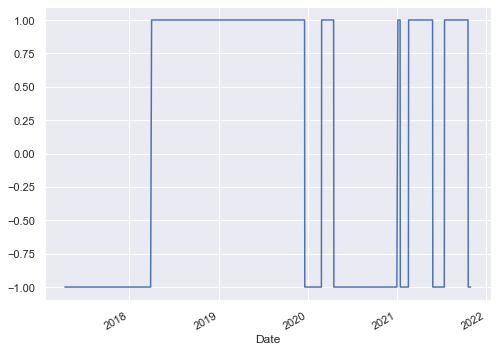

In [26]:
BB.position.dropna().plot()

In [27]:
BB['strat_return'] = BB['returns'] * BB['position'].shift()

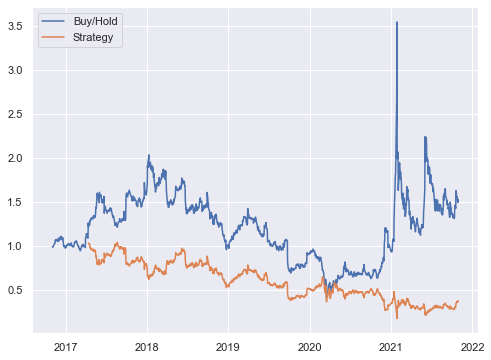

In [28]:
plt.plot(np.exp(BB['returns'].dropna()).cumprod(), label='Buy/Hold')
plt.plot(np.exp(BB['strat_return'].dropna()).cumprod(), label='Strategy')
plt.legend();

In [29]:
print(np.exp(BB['returns'].dropna()).cumprod()[-1] -1)
print(np.exp(BB['strat_return'].dropna()).cumprod()[-1] - 1)

0.527581319449522
-0.6323224705735471
